In [11]:
from process_image import *
from model_nn import *

In [12]:
input_directory = "../Dataset/Foto_Resize_Rotate_50x50" 
X_train, y_train, X_test, y_test, X_val, y_val, scalerinput = process_all(input_directory)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Found folders: ['Azmira', 'David', 'Dimas', 'Fadhli', 'Fadlin', 'Hafidz', 'Haidar', 'Hanna', 'Keiko', 'Khansa', 'Mikhael', 'Puti', 'Raesa', 'Satwika', 'Toni']
(968, 2500) (968, 15) (208, 2500) (208, 15) (208, 2500) (208, 15)


In [13]:
model_50 = FaceRecognitionModel(X_train.shape[1], [64], y_train.shape[1])

In [ ]:
error_train, error_val = model_50.train(X_train, y_train, X_val, y_val, epochs=10000, learning_rate=1e-2, optimizer='sgd', generate_new_params=True)

Params rewritten
Epoch 0, Training Loss: 3.397e+00, Validation Loss: 3.196e+00, Patience: 0, Learning Rate: 0.001
Epoch 1, Training Loss: 3.275e+00, Validation Loss: 3.125e+00, Patience: 0, Learning Rate: 0.001
Epoch 2, Training Loss: 3.189e+00, Validation Loss: 3.073e+00, Patience: 0, Learning Rate: 0.001
Epoch 3, Training Loss: 3.125e+00, Validation Loss: 3.035e+00, Patience: 0, Learning Rate: 0.001
Epoch 4, Training Loss: 3.078e+00, Validation Loss: 3.005e+00, Patience: 0, Learning Rate: 0.001
Epoch 5, Training Loss: 3.041e+00, Validation Loss: 2.982e+00, Patience: 0, Learning Rate: 0.001
Epoch 6, Training Loss: 3.011e+00, Validation Loss: 2.963e+00, Patience: 0, Learning Rate: 0.001
Epoch 7, Training Loss: 2.987e+00, Validation Loss: 2.947e+00, Patience: 0, Learning Rate: 0.001
Epoch 8, Training Loss: 2.967e+00, Validation Loss: 2.933e+00, Patience: 0, Learning Rate: 0.001
Epoch 9, Training Loss: 2.950e+00, Validation Loss: 2.921e+00, Patience: 0, Learning Rate: 0.001
Epoch 10, Tra

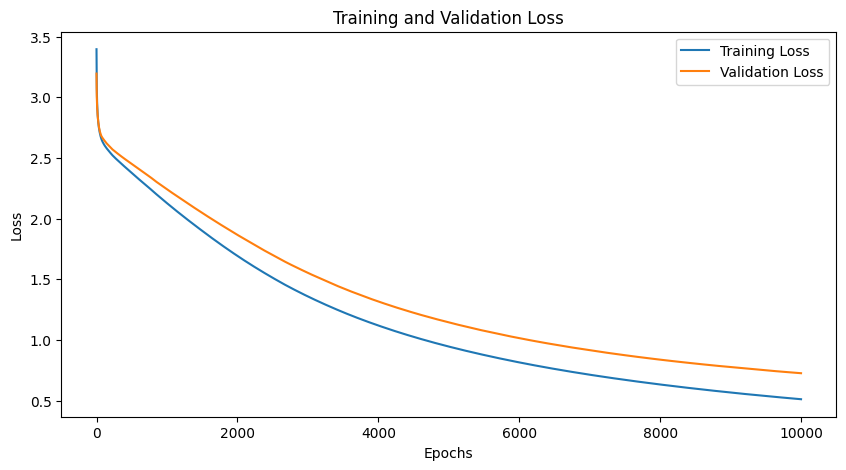

In [15]:
model_50.plot_training_error(error_train, error_val)

In [16]:
y_pred = model_50.test(X_test, y_test)
print(X_test.shape, y_test.shape, y_pred.shape)

Test Error : 0.8364855227308367
(208, 2500) (208, 15) (208, 15)


In [17]:
model_50.add_labels_from_folders(input_directory)
model_50.evaluate_metrics(X_test, y_test)

Accuracy: 0.8173076923076923
Azmira - Precision: 0.9285714285714286, Recall: 1.0, F1 Score: 0.962962962962963
David - Precision: 0.8181818181818182, Recall: 1.0, F1 Score: 0.9
Dimas - Precision: 0.8, Recall: 0.8888888888888888, F1 Score: 0.8421052631578948
Fadhli - Precision: 0.8571428571428571, Recall: 0.9230769230769231, F1 Score: 0.888888888888889
Fadlin - Precision: 0.7777777777777778, Recall: 0.9333333333333333, F1 Score: 0.8484848484848485
Hafidz - Precision: 0.6, Recall: 0.5454545454545454, F1 Score: 0.5714285714285713
Haidar - Precision: 0.6, Recall: 0.6, F1 Score: 0.6
Hanna - Precision: 0.7142857142857143, Recall: 0.6666666666666666, F1 Score: 0.689655172413793
Keiko - Precision: 0.9, Recall: 1.0, F1 Score: 0.9473684210526316
Khansa - Precision: 0.5, Recall: 0.29411764705882354, F1 Score: 0.37037037037037035
Mikhael - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Puti - Precision: 0.8888888888888888, Recall: 0.8888888888888888, F1 Score: 0.8888888888888888
Raesa - Precision: 0.78

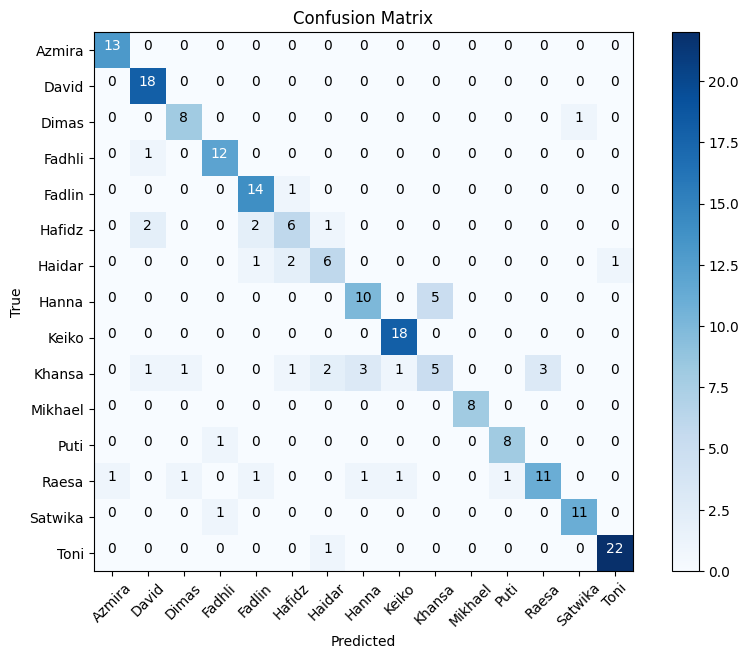

In [18]:
model_50.plot_confusion_matrix(X_test, y_test)

In [19]:
model_50.save_model("./My_Model_50/01_Yi Sang_Rotate.pkl")